In [35]:
from lib import save_animation, integrate_rk, integrate_rk_delta, domain, get_derivative_matrix, initial_gauss, save_animation_two
import numpy as np
import matplotlib.pyplot as plt

In [36]:
n_space_pts = 1000
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y[:, 0] = initial_gauss(x, l, premik=-25)
y1 = np.zeros((len(x), 2))


In [37]:
import matplotlib.pyplot as plt
def plot_static_img(x, zg, sp, t_idx):
    fig, ax = plt.subplots(2, figsize=(9, 6))
    ax[0].set_xlim(-100, 100)
    ax[0].set_ylim(-1, 1)
    ax[1].set_xlim(-100, 100)
    ax[1].set_ylim(-1, 1)
    ax[0].plot(x, zg[t_idx, :, 0])
    ax[1].plot(x, sp[t_idx, :, 0])

    ax[0].grid()
    ax[1].grid()
    fig.tight_layout()
    return fig

def plot_static_img_two(x, zg, sp, zg1, sp1, t_idx, upper_ylim=1, lower_ylim=1):
    fig, ax = plt.subplots(2, figsize=(9, 6))
    ax[0].set_xlim(-100, 100)
    ax[0].set_ylim(-1*upper_ylim, upper_ylim)
    ax[1].set_xlim(-100, 100)
    ax[1].set_ylim(-1*lower_ylim, lower_ylim)
    ax[0].plot(x, zg[t_idx, :, 0])
    ax[1].plot(x, sp[t_idx, :, 0])
    ax[0].plot(x, zg1[t_idx, :, 0], "--")
    ax[1].plot(x, sp1[t_idx, :, 0], "--")
    ax[1].set_xlabel("x")
    ax[0].set_ylabel("u")
    ax[1].set_ylabel("-v")
    ax[0].grid()
    ax[1].grid()
    fig.tight_layout()
    return fig

In [38]:
n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))


def rubberband_force(lower_y, upper_y):
    Fu = -1 * max(0, lower_y + upper_y)
    Fv = -1 * max(0, lower_y + upper_y)
    return Fu, Fv
zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=rubberband_force)



0.3354803440824289
0.1432794869283872
0.42708757593614144
max 0.27295860350615075


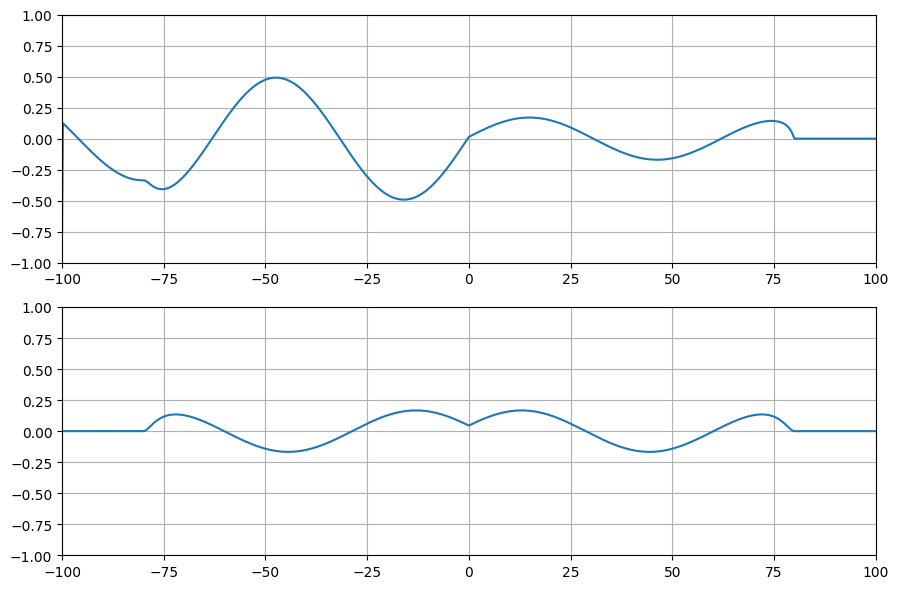

In [20]:

plot_time = 180  # 100 to get input amplitude, 200 to get outputs
fig = plot_static_img_two(x, zg_resitev, -1*sp_resitev, int(plot_time/300*len(t)), zg_resitev_1, -1*sp_resitev_1)

domena = domain(n_space_pts, d=100)
x, left_idx, middle_idx, right_idx = domena

input_amp = np.max(zg_resitev[int(100/300*len(t)), left_idx[5:], 0])
print(input_amp)
output_amp = np.max(zg_resitev[int(150/300*len(t)), right_idx[5:], 0])
print(output_amp)
print(output_amp/input_amp)

upper_left_idx = np.arange(len(x))[(x < 0) & (x > -25)]
print("max", np.max(zg_resitev[int(100/300*len(t)), upper_left_idx, 0]))

Saving animation...


MovieWriter ffmpeg unavailable; using Pillow instead.


Done - animation saved to rubberband_2.gif


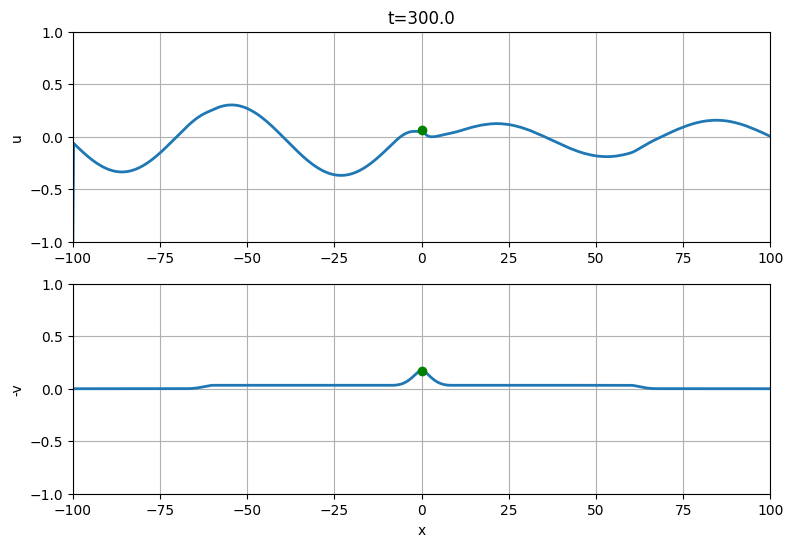

In [12]:
save_animation(x, zg_resitev, sp_resitev, t, 'rubberband_2.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


0.3354803440824289
0.10710421096354131
0.31925629281346324
max 0.27295860350611123
Saving animation...
Done - animation saved to rubberband_2_k_0_1_qu_1_qv_10.gif


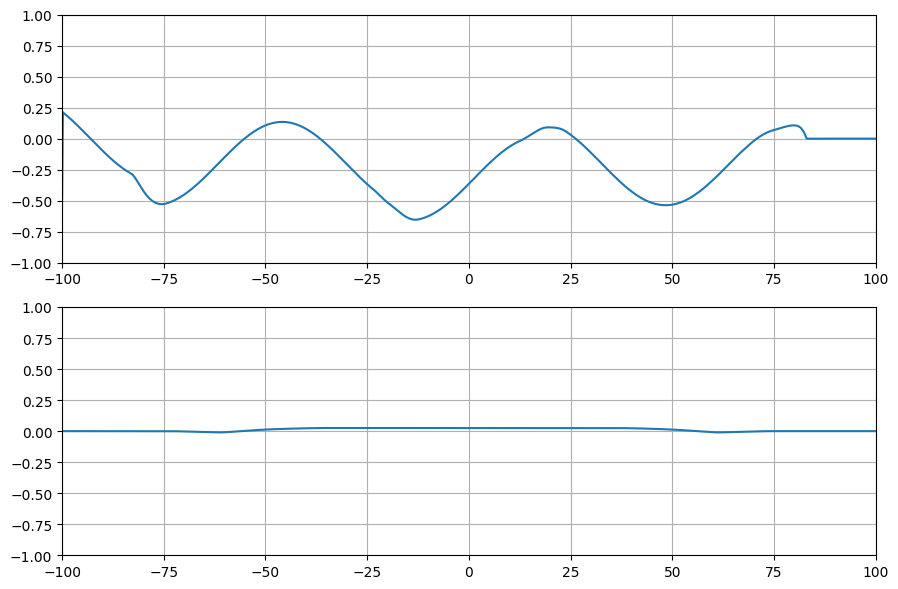

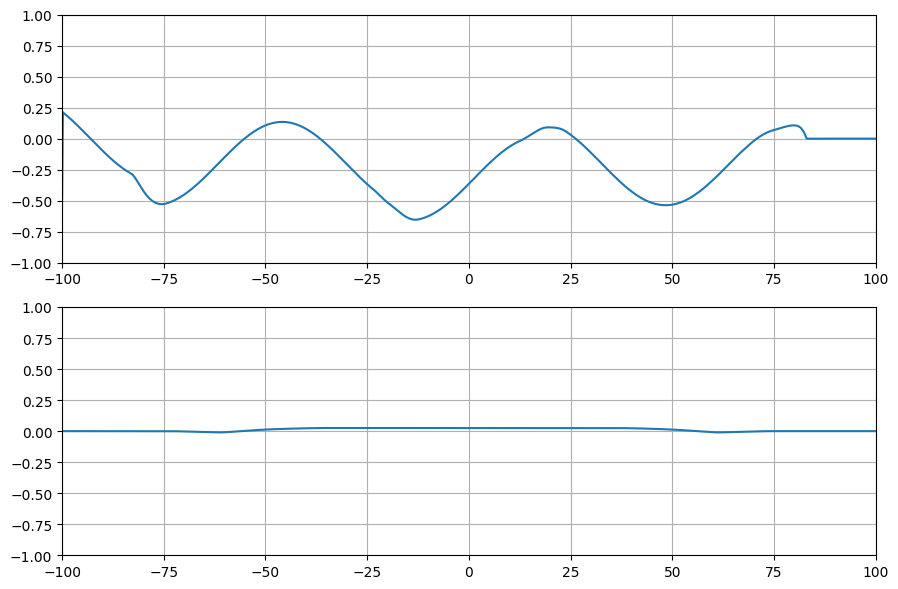

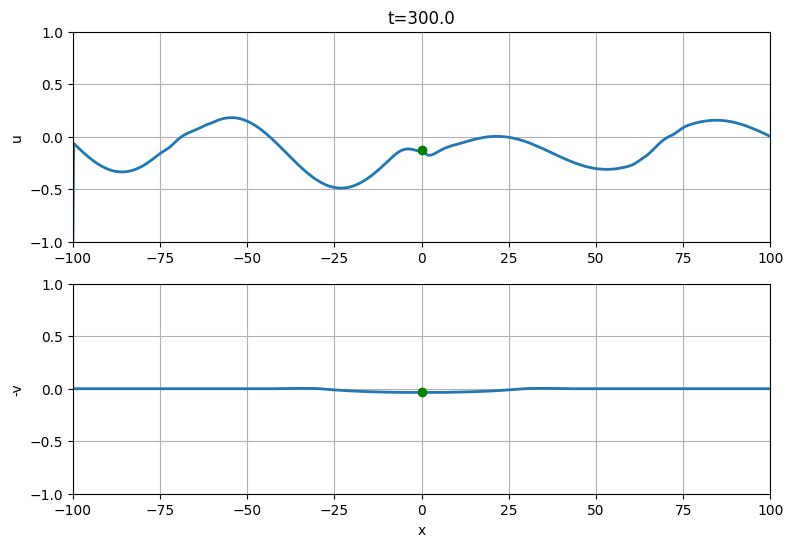

In [9]:
n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))
def rubberband_force(lower_y, upper_y):
    Fu = -1 * max(0, lower_y + upper_y)
    Fv = -1 * max(0, lower_y + upper_y)
    return Fu, Fv


zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=rubberband_force, c_squared_v=10)


plot_time = 183  # 100 to get input amplitude, 200 to get outputs
fig = plot_static_img(x, zg_resitev, sp_resitev, int(plot_time/300*len(t)))

domena = domain(n_space_pts, d=100)
x, left_idx, middle_idx, right_idx = domena

input_amp = np.max(zg_resitev[int(100/300*len(t)), left_idx[5:], 0])
print(input_amp)
output_amp = np.max(zg_resitev[int(150/300*len(t)), right_idx[5:], 0])
print(output_amp)
print(output_amp/input_amp)

upper_left_idx = np.arange(len(x))[(x < 0) & (x > -25)]
print("max", np.max(zg_resitev[int(100/300*len(t)), upper_left_idx, 0]))


plot_time = 183  # 100 to get input amplitude, 200 to get outputs
fig = plot_static_img(x, zg_resitev, sp_resitev, int(plot_time/300*len(t)))

domena = domain(n_space_pts, d=100)
x, left_idx, middle_idx, right_idx = domena

input_amp = np.max(zg_resitev[int(100/300*len(t)), left_idx[5:], 0])
output_amp = np.max(zg_resitev[int(150/300*len(t)), right_idx[5:], 0])
upper_left_idx = np.arange(len(x))[(x < 0) & (x > -25)]

save_animation(x, zg_resitev, sp_resitev, t, 'rubberband_2_k_0_1_qu_1_qv_10.gif')

In [10]:
n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))
def rubberband_force(lower_y, upper_y):
    Fu = -1 * max(0, lower_y + upper_y)
    Fv = -1 * max(0, lower_y + upper_y)
    return Fu, Fv
zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=rubberband_force)


n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))
def rubberband_force_2(lower_y, upper_y):
    Fu = -1 * max(0, lower_y + upper_y)
    Fv = -1  * max(0, lower_y + upper_y)
    return Fu, Fv
zg_resitev_1, sp_resitev_1, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=rubberband_force_2, c_squared_v=0.1)


/tmp/ipykernel_2510/3689378240.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


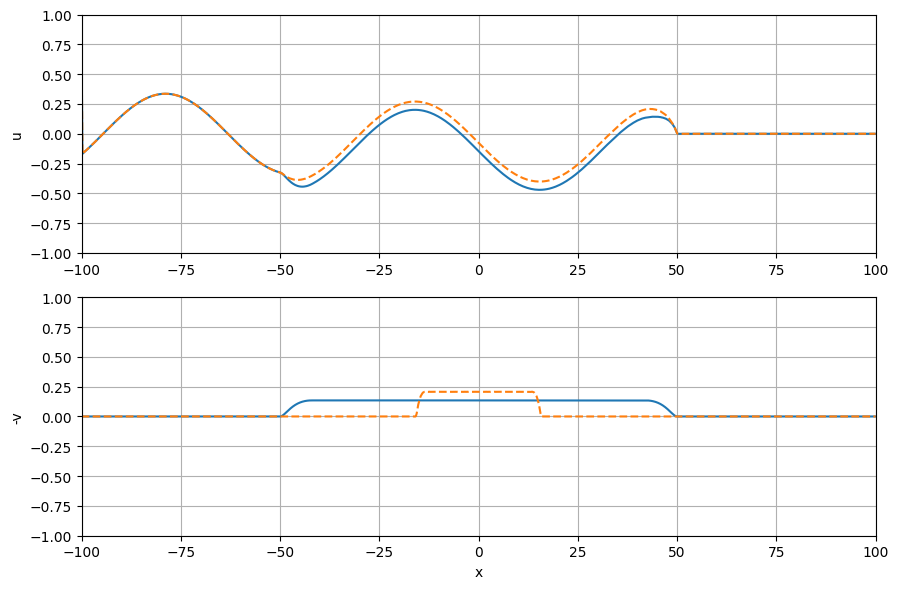

In [15]:
fig = plot_static_img_two(x, zg_resitev, -1*sp_resitev, zg_resitev_1,-1* sp_resitev_1, int(150/300*len(t)), upper_ylim=1, lower_ylim=1)
fig.show()
fig.savefig("rubberband_qv_01_vs_1.pdf")

MovieWriter ffmpeg unavailable; using Pillow instead.


Saving animation...
Done - animation saved to comparison_Qu_Qv_rubberband_10.gif


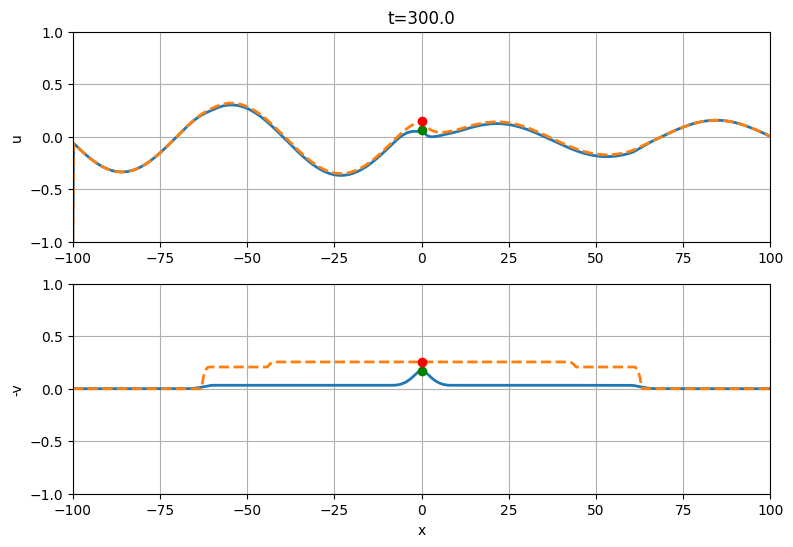

In [12]:
save_animation_two(x, zg_resitev, sp_resitev, zg_resitev_1, sp_resitev_1, t, 'comparison_Qu_Qv_rubberband_10.gif')

In [44]:
n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))
def spring_force(lower_y, upper_y):
    Fu = -1 * ( lower_y + upper_y)
    Fv = -1 * ( lower_y + upper_y)
    return Fu, Fv
zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=spring_force)


n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))
def rubberband_force(lower_y, upper_y):
    Fu = -1 * max(0, lower_y + upper_y)
    Fv = -1 * max(0, lower_y + upper_y)
    return Fu, Fv
zg_resitev_1, sp_resitev_1, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=rubberband_force)



MovieWriter ffmpeg unavailable; using Pillow instead.


Saving animation...
Done - animation saved to rubberband_vs_spring.gif


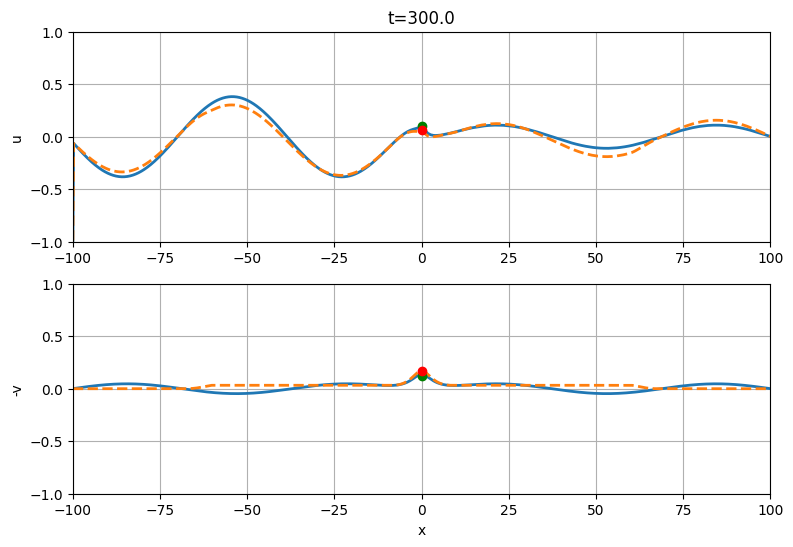

In [19]:
save_animation_two(x, zg_resitev, sp_resitev, zg_resitev_1, sp_resitev_1, t, 'rubberband_vs_spring.gif')

/tmp/ipykernel_1917/1668548064.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


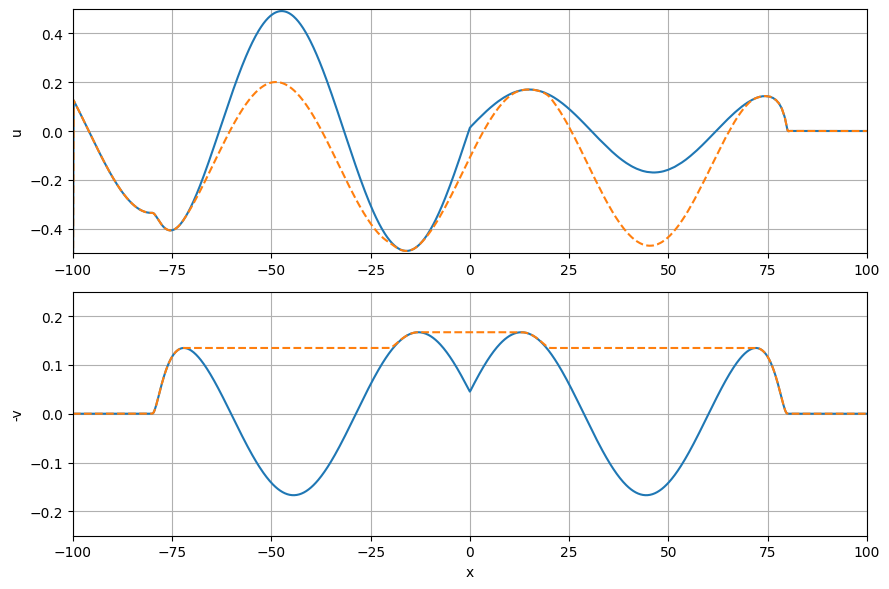

In [50]:
fig = plot_static_img_two(x, zg_resitev, -1*sp_resitev, zg_resitev_1,-1* sp_resitev_1, int(180/300*len(t)), upper_ylim=0.5, lower_ylim=0.25)
fig.show()
fig.savefig("rubberband_vs_spring_static.pdf")

In [16]:
n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))

zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=None)

n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))

zg_resitev_1, sp_resitev_1, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=None, c_squared_v=0.1)


/tmp/ipykernel_2510/3583827421.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


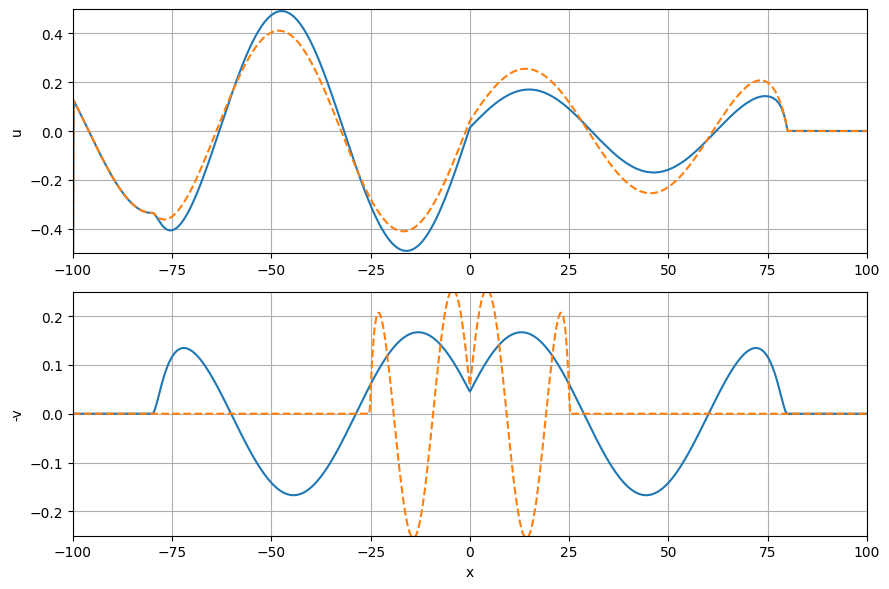

In [17]:
fig = plot_static_img_two(x, zg_resitev, -1*sp_resitev, zg_resitev_1,-1* sp_resitev_1, int(180/300*len(t)), upper_ylim=0.5, lower_ylim=0.25)
fig.show()
#fig.savefig("rubberband_vs_spring_static.pdf")


In [25]:
# lower string "amplitude" vs ratio of tension forces of the strings


def get_ampl_lower(c_squared_v):
    n_space_pts = 500
    x, l, m, r = domain(n_space_pts, d=100)
    y = np.zeros((len(x), 2))
    y1 = np.zeros((len(x), 2))
    def rubberband_force(lower_y, upper_y):
        Fu = -1 * max(0, lower_y + upper_y)
        Fv = -1 * max(0, lower_y + upper_y)
        return Fu, Fv
    zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=151, n_steps=7500, left_condition=lambda t: np.sin(0.1*t), mu=1., force_fn=rubberband_force, c_squared_v=c_squared_v)
    time_idx = int(150/151*len(t))
    return np.max(np.abs(sp_resitev[time_idx, :, 0]))



In [26]:

c_squared_v = np.linspace(0.01, 2., 20)
ampls = np.zeros_like(c_squared_v)
for i, c in enumerate(c_squared_v):
    ampls[i] = get_ampl_lower(c)


/tmp/ipykernel_2510/3097787137.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


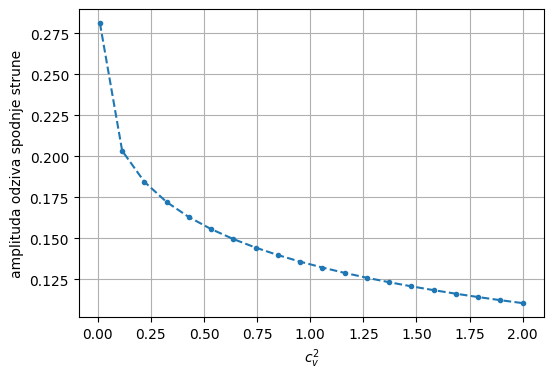

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))
# try fitting a cubic polynomial to the data
p = np.polyfit(c_squared_v, ampls, 7)
#ax.plot(c_squared_v, np.polyval(p, c_squared_v), label="fit")
ax.plot(c_squared_v, ampls, ".--")
ax.set_xlabel(r"$c^2_v$")
ax.set_ylabel(r"amplituda odziva spodnje strune")
ax.grid()
fig.savefig("ampl_vs_c_squared_v.pdf")
fig.show()